# Option 1: Computer Vision
Complexity: Easy
Task1: 
Process any given image/pdf and read the text. Using open- CV approach and Py-tesseract only.


In [27]:
#Importing necessary library
import pytesseract
import cv2
from PIL import Image
import math
from scipy.signal import convolve2d

In [28]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [59]:
img_path = "2.jpg" #image path

(-0.5, 1182.5, 287.5, -0.5)

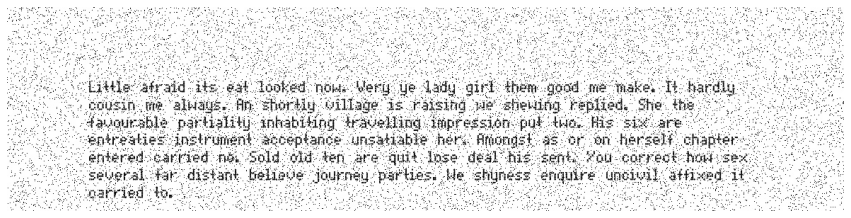

In [60]:
plt.figure(figsize = (15,10))
img = cv2.imread(img_path)
plt.imshow(img)
plt.axis('off')

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting from color to gray

In [62]:
#estimating noise in the image where sigma is the measure of noise in image
def estimate_noise(I):

  H, W = I.shape

  M = [[1, -2, 1],
       [-2, 4, -2],
       [1, -2, 1]]

  sigma = np.sum(np.sum(np.absolute(convolve2d(I, M))))
  sigma = sigma * math.sqrt(0.5 * math.pi) / (6 * (W-2) * (H-2))

  return sigma  

In [63]:
sigma = estimate_noise(gray)
print(sigma)

41.36122554144447


In [64]:
#bluring and median filtering
def filter_img(a):
    blur = cv2.GaussianBlur(a,(3,3),0)  #blur
    med_blur = cv2.medianBlur(blur, 3)  #median filter
    return med_blur

In [74]:
#if estimated noise is greater then 15 then use filtering and then use Otsu Threshold
#else use adaptive threshold for smooth image
if sigma > 15:
    processed_img = filter_img(gray)
    ret,th = cv2.threshold(processed_img, 180,255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)
else:
    th = cv2.adaptiveThreshold(gray, 230, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 5)

(-0.5, 1182.5, 287.5, -0.5)

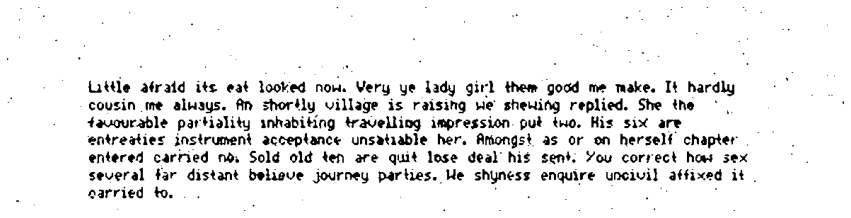

In [75]:
plt.figure(figsize = (15,10))
plt.imshow(th, cmap = 'gray')
plt.axis('off')

In [76]:
thresh, im_bw_inv = cv2.threshold(th, 200, 255, cv2.THRESH_BINARY_INV) #inverting image intensity

(-0.5, 1182.5, 287.5, -0.5)

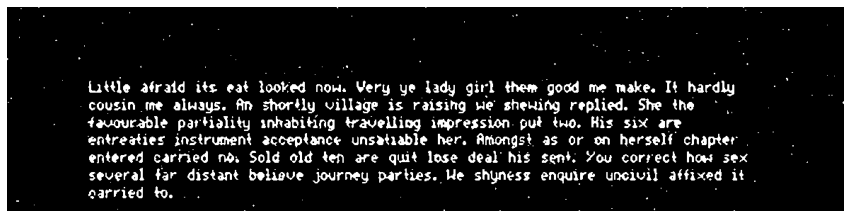

In [77]:
plt.figure(figsize = (15,10))
plt.imshow(im_bw_inv, cmap = 'gray')
plt.axis('off')

In [78]:
#dilating image for increasing thickness if charecter
kernel = np.ones((2,2),np.uint8) 
dilated_image = cv2.dilate(im_bw_inv,kernel,iterations = 1) 

(-0.5, 1182.5, 287.5, -0.5)

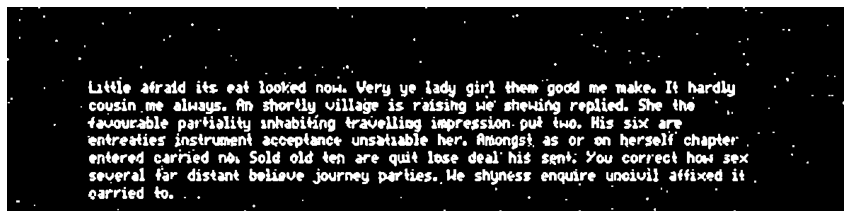

In [79]:
plt.figure(figsize = (15,10))
plt.imshow(dilated_image, cmap = 'gray')
plt.axis('off')

In [80]:
thresh, im_bw = cv2.threshold(im_bw_inv, 200, 255, cv2.THRESH_BINARY_INV) #invering again into original colour

(-0.5, 1182.5, 287.5, -0.5)

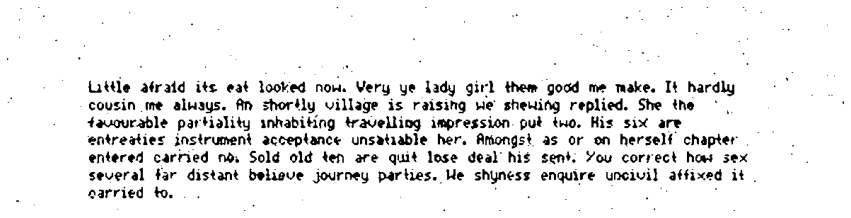

In [81]:
plt.figure(figsize = (15,10))
plt.imshow(im_bw, cmap = 'gray')
plt.axis('off')

In [82]:
print(pytesseract.image_to_string(im_bw)) # extrcting strings

Lattle afraid its eat looked now. Very ye lady girl them good me make. It hardly
cousin me always. fn shortly village is raising we shewitg replied. She the
favourable partiality inhabiting travelling impression. put two. His six are
entreaties instrument acceptance unsatiable her. Amongst as or on herself chapter
entered carried nd. Sold old ten are quit lose deal his sents You correct has sex
several far distant believe journey parties. He shyness enquire uncivil affixed it.
qarried to. :



### This process easily recognize charecter from first 3 images except pdf file.